In [3]:
import pandas as pd
import numpy as np

In [4]:
from datasets import load_dataset

ds = load_dataset("Jsevisal/go_emotions_wheel")

In [5]:
ds

DatasetDict({
    train: Dataset({
        features: ['text', 'labels', 'id'],
        num_rows: 43410
    })
    validation: Dataset({
        features: ['text', 'labels', 'id'],
        num_rows: 5426
    })
    test: Dataset({
        features: ['text', 'labels', 'id'],
        num_rows: 5427
    })
})

In [6]:
df = ds['train'].to_pandas()

In [7]:
df

,text,labels,id
0,My favourite food is anything I didn't have to...,[5],eebbqej
1,"Now if he does off himself, everyone will thin...",[5],ed00q6i
2,WHY THE FUCK IS BAYLESS ISOING,[7],eezlygj
3,To make her feel threatened,[2],ed7ypvh
4,Dirty Southern Wankers,[7],ed0bdzj
...,...,...,...
43405,Added you mate well I’ve just got the bow and ...,[0],edsb738
43406,Always thought that was funny but is it a refe...,[3],ee7fdou
43407,What are you talking about? Anything bad that ...,[7],efgbhks
43408,"More like a baptism, with sexy results!",[0],ed1naf8


In [11]:
import spacy

In [12]:
nlp = spacy.load("en_core_web_sm")

In [13]:
docs = list(nlp.pipe(df['text']))

In [14]:
token_lists = [[token.text for token in doc] for doc in docs]

In [15]:
token_counts = [len([t for t in doc if not t.is_punct and not t.is_space]) for doc in docs]

In [16]:
min_idx = token_counts.index(min(token_counts))
print(f"Renglón con MENOS tokens: {df['text'].iloc[min_idx]}")

Renglón con MENOS tokens: :((


In [17]:
max_idx = token_counts.index(max(token_counts))
print(f"Renglón con MÁS tokens: {df['text'].iloc[max_idx]}")

Renglón con MÁS tokens: For your kindness to mobile users I give a platinum ⠀⠀⠀⠀⠀⣤⣶⣶⡶⠦⠴⠶⠶⠶⠶⡶⠶⠦⠶⠶⠶⠶⠶⠶⠶⣄⠀⠀⠀⠀ ⠀⠀⠀⠀⠀⣿⣀⣀⣀⣀⠀⢀⣤⠄⠀⠀⣶⢤⣄⠀⠀⠀⣤⣤⣄⣿⠀⠀⠀⠀ ⠀⠀⠀⠀⠀⠿⣿⣿⣿⣿⡷⠋⠁⠀⠀⠀⠙⠢⠙⠻⣿⡿⠿⠿⠫⠋⠀⠀⠀⠀ ⠀⠀⠀⠀⠀⠀⢀⣤⠞⠉⠀⠀⠀⠀⣴⣶⣄⠀⠀⠀⢀⣕⠦⣀⠀⠀⠀⠀⠀⠀ ⠀⠀⠀⢀⣤⠾⠋⠁⠀⠀⠀⠀⢀⣼⣿⠟⢿⣆⠀⢠⡟⠉⠉⠊⠳⢤⣀⠀⠀⠀ ⠀⣠⡾⠛⠁⠀⠀⠀⠀⠀⢀⣀⣾⣿⠃⠀⡀⠹⣧⣘⠀⠀⠀⠀⠀⠀⠉⠳⢤⡀ ⠀⣿⡀⠀⠀⢠⣶⣶⣿⣿⣿⣿⡿⠁⠀⣼⠃⠀⢹⣿⣿⣿⣶⣶⣤⠀⠀⠀⢰⣷ ⠀⢿⣇⠀⠀⠈⠻⡟⠛⠋⠉⠉⠀⠀⡼⠃⠀⢠⣿⠋⠉⠉⠛⠛⠋⠀⢀⢀⣿⡏ ⠀⠘⣿⡄⠀⠀⠀⠈⠢⡀⠀⠀⠀⡼⠁⠀⢠⣿⠇⠀⠀⡀⠀⠀⠀⠀⡜⣼⡿⠀ ⠀⠀⢻⣷⠀⠀⠀⠀⠀⢸⡄⠀⢰⠃⠀⠀⣾⡟⠀⠀⠸⡇⠀⠀⠀⢰⢧⣿⠃⠀ ⠀⠀⠘⣿⣇⠀⠀⠀⠀⣿⠇⠀⠇⠀⠀⣼⠟⠀⠀⠀⠀⣇⠀⠀⢀⡟⣾⡟⠀⠀ ⠀⠀⠀⢹⣿⡄⠀⠀⠀⣿⠀⣀⣠⠴⠚⠛⠶⣤⣀⠀⠀⢻⠀⢀⡾⣹⣿⠃⠀⠀ ⠀⠀⠀⠀⢿⣷⠀⠀⠀⠙⠊⠁⠀⢠⡆⠀⠀⠀⠉⠛⠓⠋⠀⠸⢣⣿⠏⠀⠀⠀ ⠀⠀⠀⠀⠘⣿⣷⣦⣤⣤⣄⣀⣀⣿⣤⣤⣤⣤⣤⣄⣀⣀⣀⣀⣾⡟⠀⠀⠀⠀ ⠀⠀⠀⠀⠀⢹⣿⣿⣿⣻⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⠁⠀⠀⠀⠀ ⠀⠀⠀⠀⠀⠀⠛⠛⠛⠛⠛⠛⠛⠛⠛⠛⠛⠛⠛⠛⠛⠛⠛⠛⠃


In [18]:
from collections import Counter

unigrams = [
    token.text.lower() for doc in docs for token in doc 
    if not token.is_stop and not token.is_punct and not token.is_space
]

unigram_counts = Counter(unigrams)

In [19]:
noun_chunks = [chunk.text.lower() for doc in docs for chunk in doc.noun_chunks]
noun_chunk_counts = Counter(noun_chunks)

In [20]:
print(f'Unigramas más comunes: {unigram_counts.most_common(1)}')

Unigramas más comunes: [('like', 3273)]


In [21]:
print(f'NOUN CHUNKS más comunes: {noun_chunk_counts.most_common(1)}')

NOUN CHUNKS más comunes: [('i', 20950)]


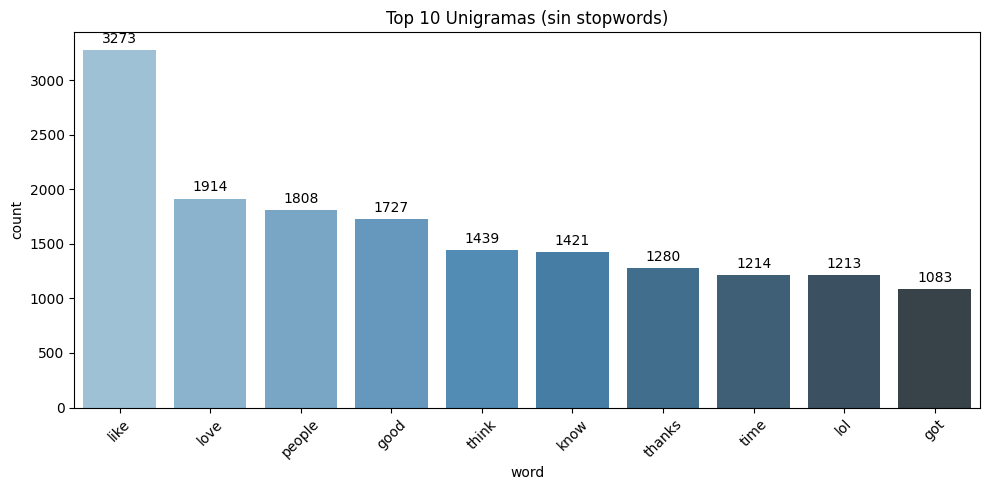

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

top_uni = unigram_counts.most_common(10)
df_plot = pd.DataFrame(top_uni, columns=["word", "count"])

plt.figure(figsize=(10, 5))
ax = sns.barplot(data=df_plot, x="word", y="count", palette="Blues_d", hue="word")

for container in ax.containers:
    ax.bar_label(container, fmt='%.0f', label_type='edge', padding=3)

plt.title("Top 10 Unigramas (sin stopwords)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [30]:
import plotly.express as px

top_uni = unigram_counts.most_common(10)
df_plot = pd.DataFrame(top_uni, columns=['word', 'count'])
fig = px.bar(df_plot, 
             y = 'count', x = 'word', 
             text_auto='.2s',
            title = 'Top 10 Unigramas (sin stopwords)')
fig.update_traces(textfont_size=12, textangle=0, textposition='inside', cliponaxis=True)
fig.show()

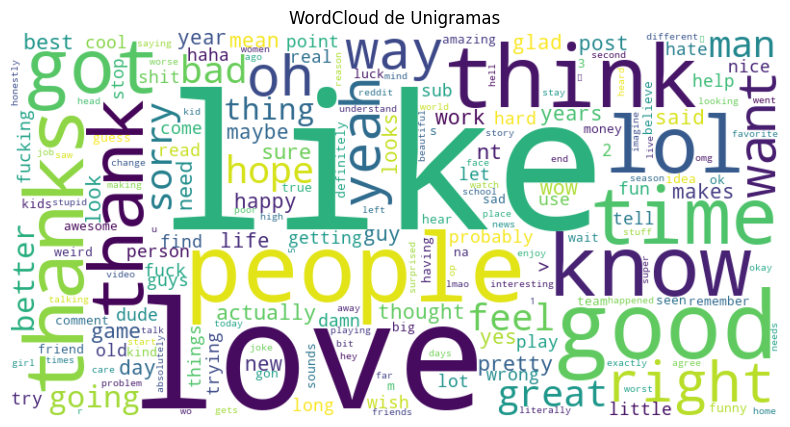

In [31]:
from wordcloud import WordCloud

wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(unigram_counts)

plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("WordCloud de Unigramas")
plt.show()

In [16]:
!conda env export --no-builds > env.yml